In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
ds_train=pd.read_csv('sales.csv')

In [3]:
ds_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
for i in ('Item_Identifier','Item_Fat_Content','Outlet_Identifier','Item_Type','Outlet_Size','Outlet_Location_Type','Item_Identifier'):
    print(ds_train[i].unique())

['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
['Medium' nan 'High' 'Small']
['Tier 1' 'Tier 3' 'Tier 2']
['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']


In [6]:
ds_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
ds_train.drop('Item_Weight',axis=1,inplace=True)

In [8]:
ds_train['Outlet_Size'].fillna(ds_train['Outlet_Size'].mode()[0],inplace = True)

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()    
for i  in ('Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type'):
    ds_train[i]=le.fit_transform(ds_train[i]) 

In [10]:
ds_train.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [11]:
ds_train.skew()
#columns fat_content and outlet sales are skewed

Item_Identifier             -0.008877
Item_Fat_Content             0.994824
Item_Visibility              1.167091
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Identifier           -0.059861
Outlet_Establishment_Year   -0.396641
Outlet_Size                 -0.087072
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
Item_Outlet_Sales            1.177531
dtype: float64

(array([ 316.,    0., 5089.,    0.,    0., 2889.,    0.,  112.,    0.,
         117.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

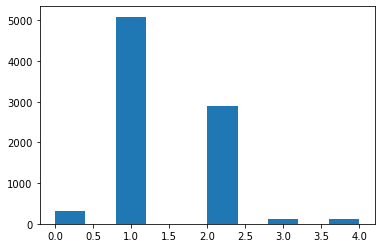

In [12]:
plt.hist(ds_train['Item_Fat_Content'],bins=10)

(array([3.280e+03, 2.448e+03, 1.527e+03, 7.290e+02, 3.590e+02, 1.240e+02,
        3.600e+01, 1.600e+01, 2.000e+00, 2.000e+00]),
 array([   33.29   ,  1338.65748,  2644.02496,  3949.39244,  5254.75992,
         6560.1274 ,  7865.49488,  9170.86236, 10476.22984, 11781.59732,
        13086.9648 ]),
 <a list of 10 Patch objects>)

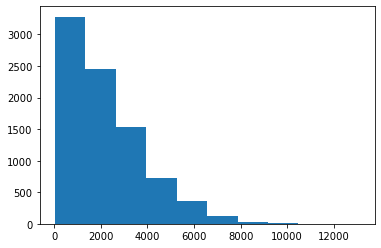

In [13]:
plt.hist(ds_train['Item_Outlet_Sales'],bins=10)

In [14]:
ds_train.drop('Item_Fat_Content',axis=1,inplace=True)

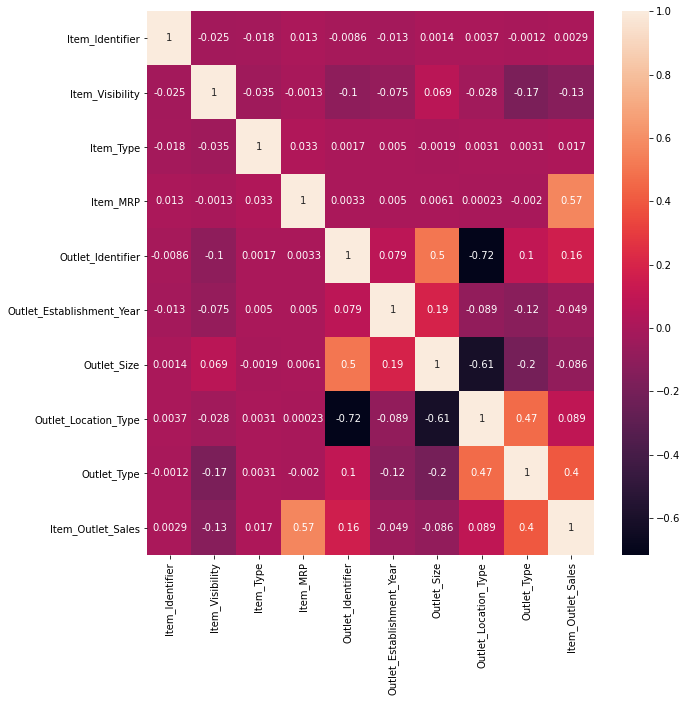

In [43]:
#Check correlation between all inputr variables and target
#target depends most on mrp and outlet type
plt.figure(figsize=(10,10))
sns.heatmap(ds_train.corr(),color='k',annot=True)

In [15]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
ds2_nparr=pt.fit_transform(ds_train)
ds_tr_fin=pd.DataFrame(ds2_nparr)

C:\Users\atakle\Anaconda3\lib\site-packages\numpy\core\_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\atakle\Anaconda3\lib\site-packages\numpy\core\_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)


In [16]:
ds_tr_fin.skew()

0   -0.293700
1    0.124279
2   -0.164574
3   -0.115386
4   -0.213935
5   -0.200959
6   -0.042980
7   -0.220632
8    0.007863
9   -0.074791
dtype: float64

In [17]:
ds_tr_fin.head()

,0,1,2,3,4,5,6,7,8,9
0,-1.461039,-1.146886,-0.712347,1.623670,1.427394,0.048562,-0.293295,-1.373843,-0.123488,0.985078
1,-2.093858,-1.037100,1.504660,-1.595016,-0.548577,1.461925,-0.293295,1.088324,1.040591,-1.218135
2,-0.154018,-1.122375,0.684390,0.081237,1.427394,0.048562,-0.293295,-1.373843,-0.123488,0.220360
3,0.773522,-1.745551,-0.215420,0.689968,-1.809119,-0.075796,-0.293295,1.088324,-1.915952,-0.835183
4,1.098294,-1.745551,0.468410,-1.476078,-1.343810,-1.270835,-1.925925,1.088324,-0.123488,-0.566616


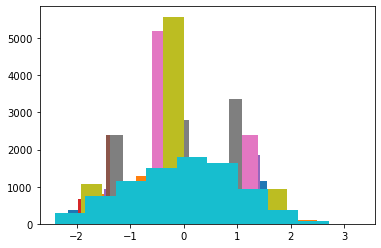

In [18]:
for i in range (0,10):
    plt.hist(ds_tr_fin[i],bins=10)

In [ ]:
#the data is pretty normal now

In [19]:
#remove outliers
from scipy.stats import zscore
z=np.abs(zscore(ds_tr_fin))
z
ds_f = ds_tr_fin[(z<3).all(axis=1)]

In [20]:
x=ds_f.iloc[:,0:-1]
y=ds_f.iloc[:,-1]

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,classification_report

In [22]:
lr = LinearRegression()
lr.fit(x,y)

LinearRegression()

In [23]:
ds_test=pd.read_csv('test.csv')

In [24]:
ds_test.drop('Item_Weight',axis=1,inplace=True)
ds_test.drop('Item_Fat_Content',axis=1,inplace=True)

In [25]:
ds_test['Outlet_Size'].fillna(ds_test['Outlet_Size'].mode()[0],inplace = True)

In [26]:
#label encode categorical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()    
for i  in ('Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type'):
    ds_test[i]=le.fit_transform(ds_test[i]) 

In [28]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
ds3_nparr=pt.fit_transform(ds_test)
ds_test_fin=pd.DataFrame(ds3_nparr)

C:\Users\atakle\Anaconda3\lib\site-packages\numpy\core\_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\atakle\Anaconda3\lib\site-packages\numpy\core\_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)


In [29]:
#divide data
x_test=ds_test_fin.iloc[:,0:-1]
y_test=ds_test_fin.iloc[:,-1]

In [31]:
#predict
pred=lr.predict(x_test)

In [32]:
print(r2_score(y_test,pred))

0.6205378566773357


In [39]:
x_train=x_test
y_train=y_test

In [40]:
#using random forest to check if we get better results
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr.score(x_train,y_train)

0.9530677143054814

In [41]:
predicted=rfr.predict(x_test)

In [42]:
print(r2_score(y_test,predicted))

0.9530677143054814


In [37]:
x_train.shape

(5681, 8)

In [38]:
x_test.shape

(8523, 9)

In [44]:
#finalize model randomforestregressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
predicted=rfr.predict(x_test)
print(r2_score(y_test,predicted))

0.9531816810851621


In [45]:
import joblib
joblib.dump(lr,'sales.pkl')

['sales.pkl']